In [11]:
import re
import urllib.request
import zipfile
import nltk
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize


In [8]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f71f0ed9890>)

In [12]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
from gensim.models import FastText

model = FastText(result, size=100, window=5, min_count=5, workers=4, sg=1)

In [15]:
model.wv.most_similar("electrofishing")

[('electrolux', 0.8058260679244995),
 ('electrolyte', 0.7970739603042603),
 ('electric', 0.7949180603027344),
 ('electro', 0.7901310920715332),
 ('electrogram', 0.75501549243927),
 ('airbus', 0.7543455362319946),
 ('electrons', 0.7532612681388855),
 ('overfishing', 0.752717137336731),
 ('electrochemical', 0.7509528398513794),
 ('electron', 0.7489890456199646)]

Word2Vec는 학습하지 않은 단어에 대해서 유사한 단어를 찾아내지 못 했지만, FastText는 유사한 단어를 계산해서 출력하고 있음을 볼 수 있습니다.

# 한국어 fasttext
- 참고 사이트 : https://inspiringpeople.github.io/data%20analysis/word_embedding/

In [44]:
from __future__ import print_function
from gensim.models import KeyedVectors

# Creating the model
ko_model = KeyedVectors.load_word2vec_format('/content/drive/MyDrive/ML DL STUDY/data/fasttext/wiki.ko.vec')

In [45]:
# Getting the tokens 
words = []
for word in ko_model.vocab:
    words.append(word)

# Printing out number of tokens available
print("Number of Tokens: {}".format(len(words)))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(
    len(ko_model[words[0]])
))

# Print out the vector of a word 
print("Vector components of a word: {}".format(
    ko_model[words[0]]
))

print(words[0])

Number of Tokens: 879129
Dimension of a word vector: 300
Vector components of a word: [ 4.0987e-01  5.3006e-03 -1.5832e+00 -1.0234e+00  2.7239e-01 -1.2325e+00
 -2.8500e-01 -5.9057e-01 -7.1622e-01 -7.8779e-01  4.6649e-02  3.1382e-01
 -4.1487e-01 -9.1984e-01 -3.0980e-01 -1.5516e-01  8.1917e-02 -8.8866e-01
 -2.6710e-02 -7.6736e-01  1.0054e+00 -2.7689e-01  6.0095e-01 -6.6004e-02
  5.7456e-01  6.7092e-01 -1.4202e-01  3.1292e-01 -8.1834e-01  3.1503e-01
  8.6697e-01 -9.3468e-01 -1.0193e+00  3.2536e-01 -6.4223e-01 -7.6901e-01
 -1.3965e+00 -1.2300e+00 -2.8656e-01 -3.4853e-01  1.0772e+00  1.2494e+00
  3.3720e-01 -7.6690e-01  6.3737e-01 -4.4553e-01  5.1555e-01 -3.8258e-01
  8.6264e-01 -6.9718e-01  1.4699e+00  6.7000e-01 -1.2923e+00 -1.0476e-01
  9.5305e-01  4.7174e-02  1.0691e+00  6.5087e-01  1.4713e+00 -8.3216e-01
  7.1885e-01  1.8395e+00 -4.4246e-01  3.1631e-01  7.3043e-02 -1.9448e+00
  1.0989e+00 -2.6499e+00  1.2871e+00 -1.2371e-01 -6.1374e-01  2.7363e-01
 -4.9095e-01  6.3166e-01 -5.0715e-01  

In [46]:
# Pick a word 
find_similar_to = '사랑'

# Finding out similar words [default= top 10]
for similar_word in ko_model.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.2f}".format(
        similar_word[0], similar_word[1]
    ))



Word: 사랑사랑, Similarity: 0.81
Word: 사랑치, Similarity: 0.78
Word: 사랑일, Similarity: 0.77
Word: 사랑느낌, Similarity: 0.76
Word: 사랑이었네, Similarity: 0.76
Word: 사랑이여, Similarity: 0.75
Word: 사랑병, Similarity: 0.75
Word: 사랑인, Similarity: 0.75
Word: 사랑맛, Similarity: 0.75
Word: 사랑노래, Similarity: 0.74


In [59]:
# Test words 
word_add = ['동물']
word_sub = ['사자']

# Word vector addition and subtraction 
for resultant_word in ko_model.most_similar(
    positive=word_add, negative=word_sub
):
    print("Word : {0} , Similarity: {1:.2f}".format(
        resultant_word[0], resultant_word[1]
    ))


Word : 실험동물 , Similarity: 0.51
Word : 동물실험 , Similarity: 0.46
Word : 동물실험에서 , Similarity: 0.44
Word : 동물실험의 , Similarity: 0.44
Word : 아동물 , Similarity: 0.44
Word : 세포유전학 , Similarity: 0.44
Word : 신경생물학적 , Similarity: 0.43
Word : 동물실험을 , Similarity: 0.43
Word : 미생물학적 , Similarity: 0.43
Word : 생물의학적 , Similarity: 0.42


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0,

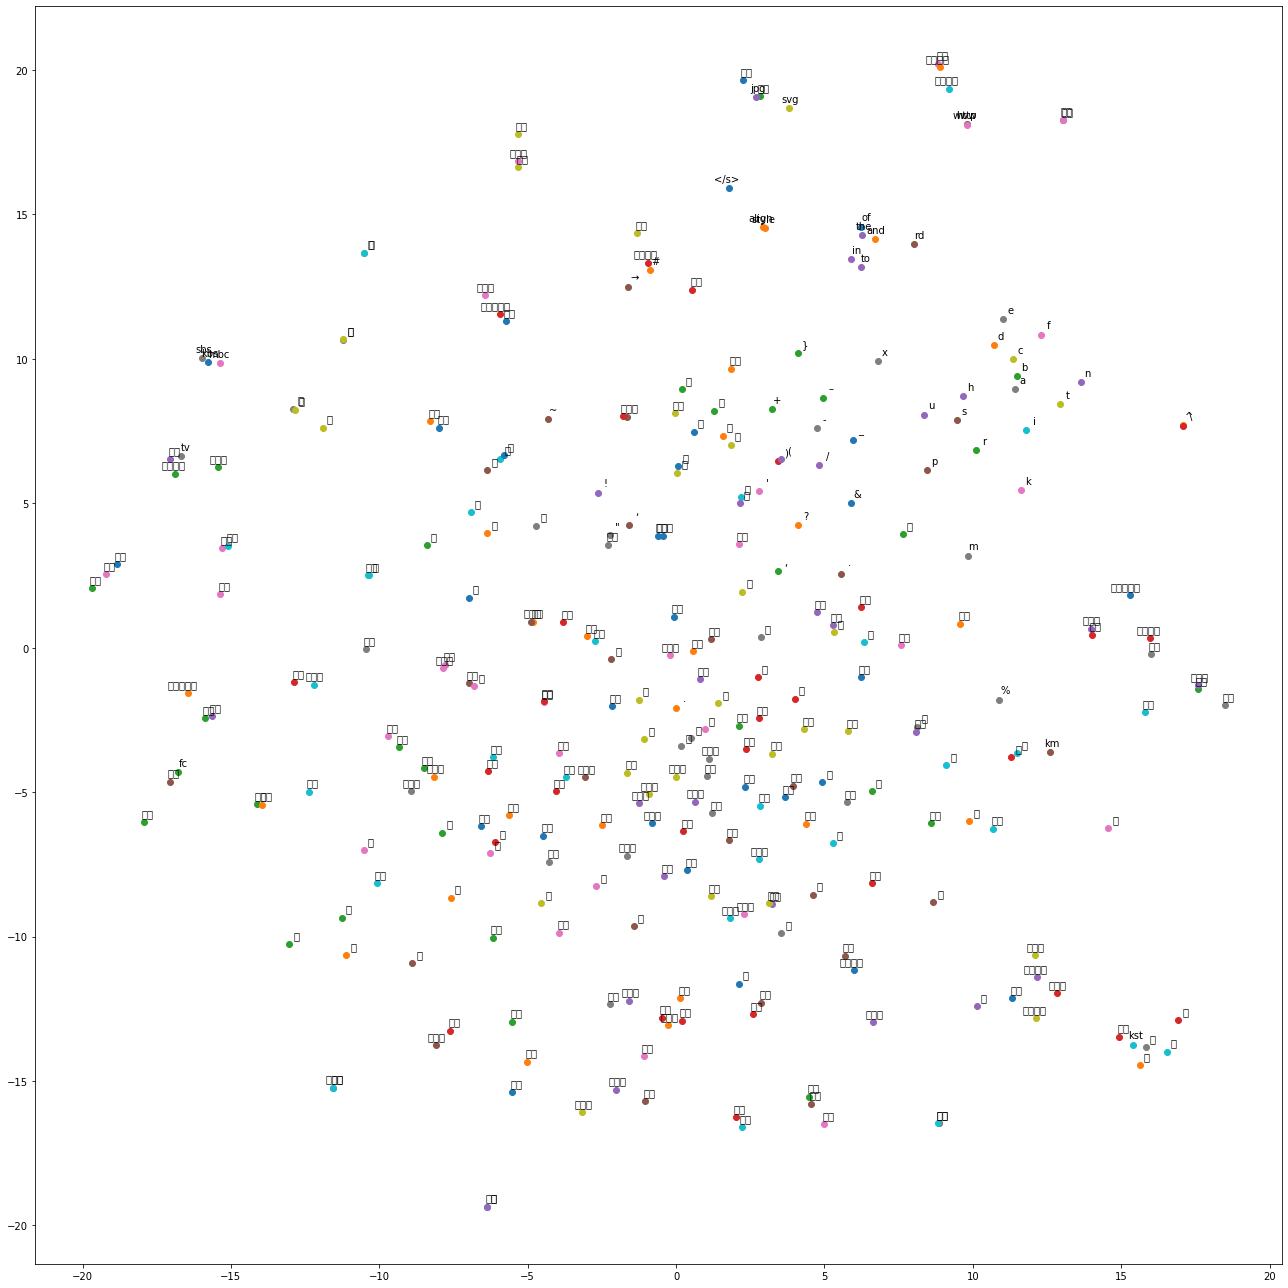

In [60]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
font_name = font_manager.FontProperties(fname="/content/drive/MyDrive/ML DL STUDY/data/font/malgun.ttf").get_name()
rc('font', family=font_name)
rcParams.update({'figure.autolayout': True})
%matplotlib inline

# Limit number of tokens to be visualized
limit = 300
vector_dim = 300

# Getting tokens and vectors
words = []
embedding = np.array([])
i = 0
for word in ko_model.vocab:
    # Break the loop if limit exceeds 
    if i == limit: break

    # Getting token 
    words.append(word)

    # Appending the vectors 
    embedding = np.append(embedding, ko_model[word])

    i += 1

# Reshaping the embedding vector 
embedding = embedding.reshape(limit, vector_dim)


def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
    assert low_dim_embs.shape[0] >= len(labels), "More labels than embeddings"
    plt.figure(figsize=(18, 18))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(10, 4),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
    plt.savefig(filename)


# Creating the tsne plot [Warning: will take time]
tsne = TSNE(perplexity=30.0, n_components=2, init='pca', n_iter=5000)

low_dim_embedding = tsne.fit_transform(embedding)

# Finally plotting and saving the fig 
plot_with_labels(low_dim_embedding, words)